# ML_Projekt



In [13]:
import pandas as pd
import numpy as np
import sklearn
trainDF = pd.read_csv("data\\train.csv",sep = ";")
testDF = pd.read_csv("data\\test.csv", sep= ";")
trainDF = trainDF.dropna()
trainDF

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0
...,...,...,...,...,...
22394,7566609213,"[1, 2, 1]",existing,174.0,0
22395,5461363334,"[4, 5, 4]",new,147.0,0
22397,1590423615,"[0, 4, 3]",new,249.0,1
22398,1800993941,"[0, 5, 1, 2, 5, 5, 4, 4]",existing,80.0,0


In [2]:
testDF = testDF.dropna()
testDF

,transactionId,basket,customerType,totalAmount,returnLabel
0,4132523932,"[4, 3, 4, 3, 2, 3]",existing,366.0,1
1,8998574539,"[3, 4, 4, 3, 5]",existing,85.0,0
2,9346688547,"[1, 1, 2, 2, 4, 4, 3, 1, 1, 0, 3]",existing,275.0,0
3,4533897707,"[3, 2, 2, 1, 5, 1, 1, 0]",existing,528.0,0
4,3334800500,"[4, 2, 3, 5, 2, 5, 1]",existing,287.0,0
...,...,...,...,...,...
9595,7995301628,"[1, 3]",existing,66.0,0
9596,7387398375,"[1, 4, 3, 3]",existing,40.0,0
9597,2777556607,[4],existing,126.0,1
9598,7205276301,"[4, 5, 4, 1, 0, 2, 0]",existing,70.0,0


## EDA(Exploratory Data Analysis)


<AxesSubplot:>

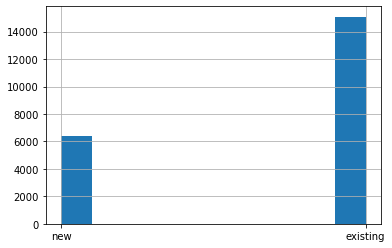

In [3]:
import matplotlib.pyplot as plt#
trainDF['customerType'].hist()

<AxesSubplot:>

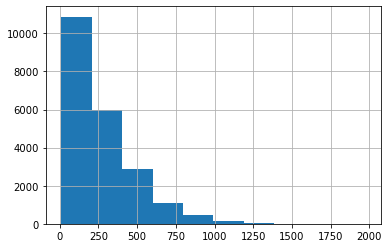

In [4]:
trainDF['totalAmount'].hist()

<AxesSubplot:>

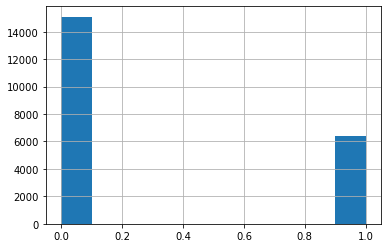

In [5]:
trainDF['returnLabel'].hist()

In [6]:
df = trainDF.drop("transactionId",axis=1)
df = df.drop("basket",axis=1)
df = df.drop("totalAmount", axis =1)

<AxesSubplot:>

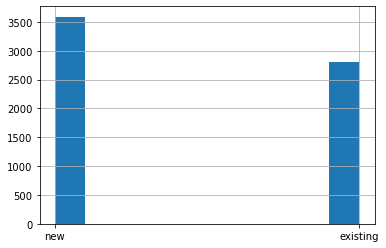

In [7]:
df[(df['returnLabel']== 1)]['customerType'].hist()


<AxesSubplot:>

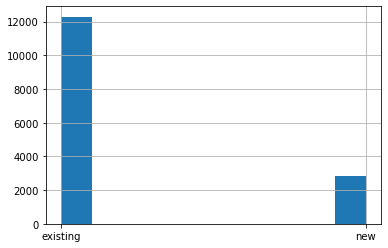

In [8]:
df[(df['returnLabel']== 0)]['customerType'].hist()

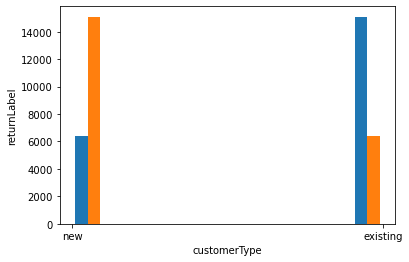

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.hist(df)
ax.set_xlabel('customerType')
ax.set_ylabel('returnLabel')
ax.legend
plt.show()

<AxesSubplot:title={'center':'totalAmount'}, xlabel='returnLabel'>

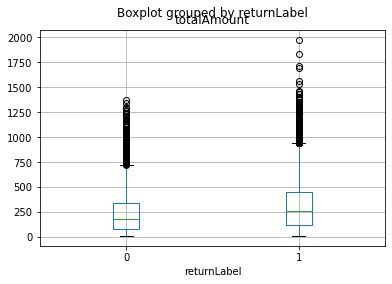

In [10]:
trainDF.boxplot("totalAmount", by="returnLabel")

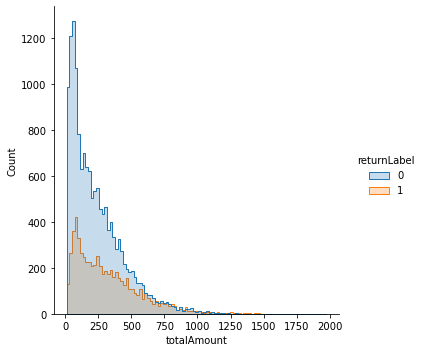

In [16]:
import seaborn
seaborn.displot(trainDF, x="totalAmount", hue="returnLabel", element="step")

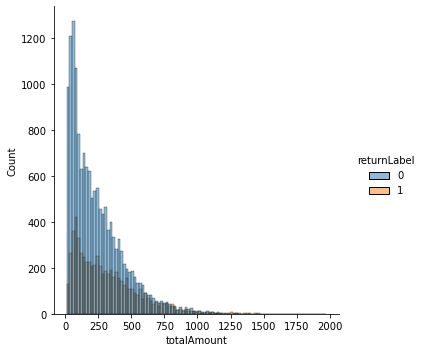

In [17]:
seaborn.displot(trainDF, x="totalAmount", hue="returnLabel", element="bars")

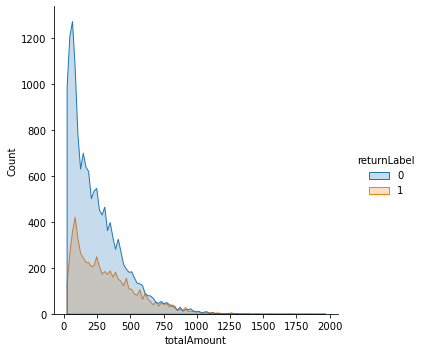

In [18]:
seaborn.displot(trainDF, x="totalAmount", hue="returnLabel", element="poly")

## Daten Aufbereitung

In [21]:
df_train = pd.read_csv("data/train.csv", sep=";")
df_test = pd.read_csv("data/test.csv", sep=";")

In [22]:
df_train['customerType'].fillna(method='ffill', inplace=True)
df_train['totalAmount'] = df_train['totalAmount'].fillna(df_train['totalAmount'].mean())
df_train.head()

,transactionId,basket,customerType,totalAmount,returnLabel
0,9534310106,"[4, 3, 4]",new,252.0,1
1,7202594767,"[4, 2, 0, 2, 5]",existing,70.0,0
2,2737331698,[5],existing,84.0,0
3,4868011733,"[1, 4, 2, 4]",existing,116.0,0
4,7622406570,"[2, 5, 3, 2, 3, 2, 0]",existing,378.0,0


In [23]:
def createFeatures(df):
    basket = []
    for df_basket in df['basket']:
        basket.append(eval(df_basket))
    df = df.drop(columns='basket')
    for it in range(0, len(basket)):
        df.at[it, 'amountBooks'] = len(basket[it])
        for category in range(0, 6):
            df.at[it, 'categoryBook' + str(category)] = basket[it].count(category)
    return pd.get_dummies(df)

df_train = createFeatures(df_train)
df_train.head()

,transactionId,totalAmount,returnLabel,amountBooks,categoryBook0,categoryBook1,categoryBook2,categoryBook3,categoryBook4,categoryBook5,customerType_existing,customerType_new
0,9534310106,252.0,1,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0,1
1,7202594767,70.0,0,5.0,1.0,0.0,2.0,0.0,1.0,1.0,1,0
2,2737331698,84.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
3,4868011733,116.0,0,4.0,0.0,1.0,1.0,0.0,2.0,0.0,1,0
4,7622406570,378.0,0,7.0,1.0,0.0,3.0,2.0,0.0,1.0,1,0
